# Regression Practice 
### *2018-10-27* | *Steven Rankine* | *Data Analytics Boot Camp (Fall 2018)*
- - -

In [182]:
# Import Rrequired libraries
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import sklearn
os.getcwd()

'/home/nbuser/library/notebooks'

## (1) Earth Crisis
As Earth’s population continues to grow, the solid waste generated by the population grows with it.  Governments must plan for disposal and recycling of ever growing amounts of solid waste.  Planners can use data from the past to predict future waste generation and plan for enough facilities for disposing of and recycling the waste.

Given the following data on the waste generated in Florida from 1990-1994, how can we construct a model to predict the waste that was generated in the years 1995-1999?

In [183]:
# Import data into the python environment
Location = '../datasets/EarthCrisisData.xlsx'
df = pd.read_excel(Location)
df.columns = ['Year', 'Waste']
df.head() 

,Year,Waste
0,1990,19358
1,1991,19484
2,1992,20293
3,1993,21499
4,1994,23561


In [184]:
model = sm.ols(formula='Waste ~ Year', data=df).fit()
print(model.summary())
pred = model.predict(df.Year + 5).iloc[0:5] 

                            OLS Regression Results                            
Dep. Variable:                  Waste   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     24.82
Date:                Sat, 27 Oct 2018   Prob (F-statistic):             0.0155
Time:                        03:21:46   Log-Likelihood:                -38.290
No. Observations:                   5   AIC:                             80.58
Df Residuals:                       3   BIC:                             79.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.055e+06   4.17e+05     -4.932      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


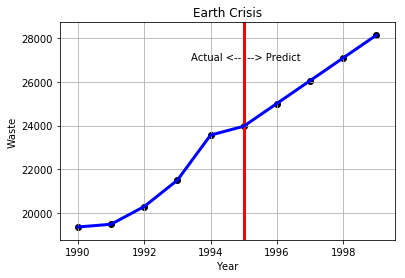

,Year,Waste
0,1990,19358.0
1,1991,19484.0
2,1992,20293.0
3,1993,21499.0
4,1994,23561.0
5,1995,23965.3
6,1996,25007.4
7,1997,26049.5
8,1998,27091.6
9,1999,28133.7


In [185]:
# Visualize Predictions
i = 0
tmp = df
for y in range(1995,2000) :
        df2 = pd.DataFrame([[y,pred[i]]], columns=list(['Year','Waste']))
        tmp = tmp.append(df2, ignore_index=True)
        i += 1
# Labeling the Axes and Title
plt.title('Earth Crisis')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Waste')
plt.annotate(xy=[1995.0,27000], s=' --> Predict') 
plt.annotate(xy=[1993.4,27000], s='Actual <-- ') 
plt.axvline(x=1995, color='red', linewidth=3)
plt.plot(tmp.Year, tmp.Waste, color='blue', linewidth=3)
plt.scatter(tmp.Year, tmp.Waste,  color='black')
plt.show()
tmp

## (2) Sales IQ Problem
The ABC corporation is opening new retail sales outlets and they want to staff these stores with employees most likely to be successful at selling the products.  To meet this goal, ABC decides to study the sales staff at existing stores to determine if intelligence and extroversion (i.e., a friendly and outgoing personality) predict sales performance of current employees.  ABC's logic is that if intelligence and extroversion predicts sales performance, then a good strategy for new stores is to hire intelligent extroverts for the sales positions.

To conduct the study, all current retail sales employees at existing stores take psychological tests designed to measure intelligence and extroversion.  Also, past sales performance data is checked for each employee.  In the end, there are three scores for each sales person:

    an intelligence score (on a scale of 50-low intelligence to 150-high intelligence),
    an extroversion score (on a scale of 15-low extroversion to 30-high extroversion), and
    sales performance expressed as the average dollar amount sold per week.
    
In these types of studies, the variables used to forecast (intelligence and extroversion) are called "predictors" and the variable being forecast (sales performance) is called the "criterion".  The predictor and criterion data are presented for the 20 current sales employees of the ABC corporation.

What can you tell the executives of ABC about their salespeople from this data?

In [187]:
# Import data into the python environment
Location = '../datasets/SalesIQData.xlsx'
df = pd.read_excel(Location)
df.columns = ['SalesPerson','Intelligence','Extroversion','Sales']
df.head() 

,SalesPerson,Intelligence,Extroversion,Sales
0,1,89,21,2625
1,2,93,24,2700
2,3,91,21,3100
3,4,122,23,3150
4,5,115,27,3175


In [195]:
tmp = df.iloc[1:,1:]
model = sm.ols(formula='Sales ~ Intelligence + Extroversion', data=tmp).fit()
print(model.summary())
#pred = model.predict(df.Year + 5).iloc[0:5] 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     5.011
Date:                Sat, 27 Oct 2018   Prob (F-statistic):             0.0204
Time:                        04:41:39   Log-Likelihood:                -135.27
No. Observations:                  19   AIC:                             276.5
Df Residuals:                      16   BIC:                             279.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1037.6733    665.708      1.559   

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


## (3) Tamiami Tamales
Tami, from Miami, wants to open a Tamale Cart in New York City, she already knows her expenses but she doesn't know what to charge. She was able to secure the average daily sales data for hot dog carts by district in the NYC area. Analyze this data to figure out a relationship between price and quantity sold. You can use this relationship as a benchmark for what people are willing to spend for a quick lunch. You need to provide:

1. the equation for quantity
2. the list of other relevant factors (other than price) that affect sales (if any)

In [7]:
# Import data into the python environment
Location = '../datasets/TamiamiTamalesData.xlsx'
df = pd.read_excel(Location)
df.head() 

,Cart Location,Hot Dog Sales,Employees in Nearby Office Buildings,Num of Nearby Restaurants,Num of Other Food Carts Nearby,Price
0,1.0,100,1600.0,8.0,12.0,4.1600
1,2.0,80,1200.0,6.0,13.0,4.6325
2,3.0,450,2800.0,19.0,6.0,0.5000
3,4.0,580,4300.0,19.0,2.0,0.4700
4,5.0,100,1400.0,6.0,13.0,4.2400


## (4) Phil's Fish Factory
Take a look at the data in the file and see if you can figure out what drives the number of lobsters sold.

In [10]:
# Import data into the python environment
Location = '../datasets/PhilsFishFactoryData.xlsx'
df = pd.read_excel(Location)
df.head() 

,Unnamed: 0,Day,Wholesale Price ($/lb),# Lobsters sold
0,NaN,Fri,7.0,4
1,NaN,sat,4.0,29
2,NaN,Sun,6.5,18
3,NaN,Mon,5.0,17
4,NaN,Tue,4.0,25
